In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
path = 'C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\Machine Learning A-Z\\Part 8 - Deep Learning\\Section 39 - Artificial Neural Networks (ANN)\\Churn_Modelling.csv'
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [155]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [159]:
np.argmin(df['Exited'].value_counts())

1

In [135]:
7963 / (7963+2037)

0.7963

In [160]:
def balance_classes(dataframe, var):
    
    '''
    Apply when the dependent variable is in numeric form and is binary. 
    '''
    
    zero = dataframe[dataframe[var] == 0]
    one = dataframe[dataframe[var] == 1]
    
    shape_zero = zero.shape[0]
    shape_one = one.shape[0]
    
    if shape_zero > shape_one:
        zero = zero.sample(one.shape[0])
        df = zero.append(one,ignore_index=True)

    else:
        one = one.sample(zero.shape[0])
        df = one.append(zero,ignore_index=True)
                
    return df



In [137]:
df = balance_classes(df, 'Exited')
df['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [54]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
def data_types(data):
    for i in data.columns:
        print(i + '\t\t\t' + str(data[i][0]) + '\t\t\t' + str(type(data[i][0])))
        print('\n')

In [7]:
data_types(df)

RowNumber			1			<class 'numpy.int64'>


CustomerId			15634602			<class 'numpy.int64'>


Surname			Hargrave			<class 'str'>


CreditScore			619			<class 'numpy.int64'>


Geography			France			<class 'str'>


Gender			Female			<class 'str'>


Age			42			<class 'numpy.int64'>


Tenure			2			<class 'numpy.int64'>


Balance			0.0			<class 'numpy.float64'>


NumOfProducts			1			<class 'numpy.int64'>


HasCrCard			1			<class 'numpy.int64'>


IsActiveMember			1			<class 'numpy.int64'>


EstimatedSalary			101348.88			<class 'numpy.float64'>


Exited			1			<class 'numpy.int64'>




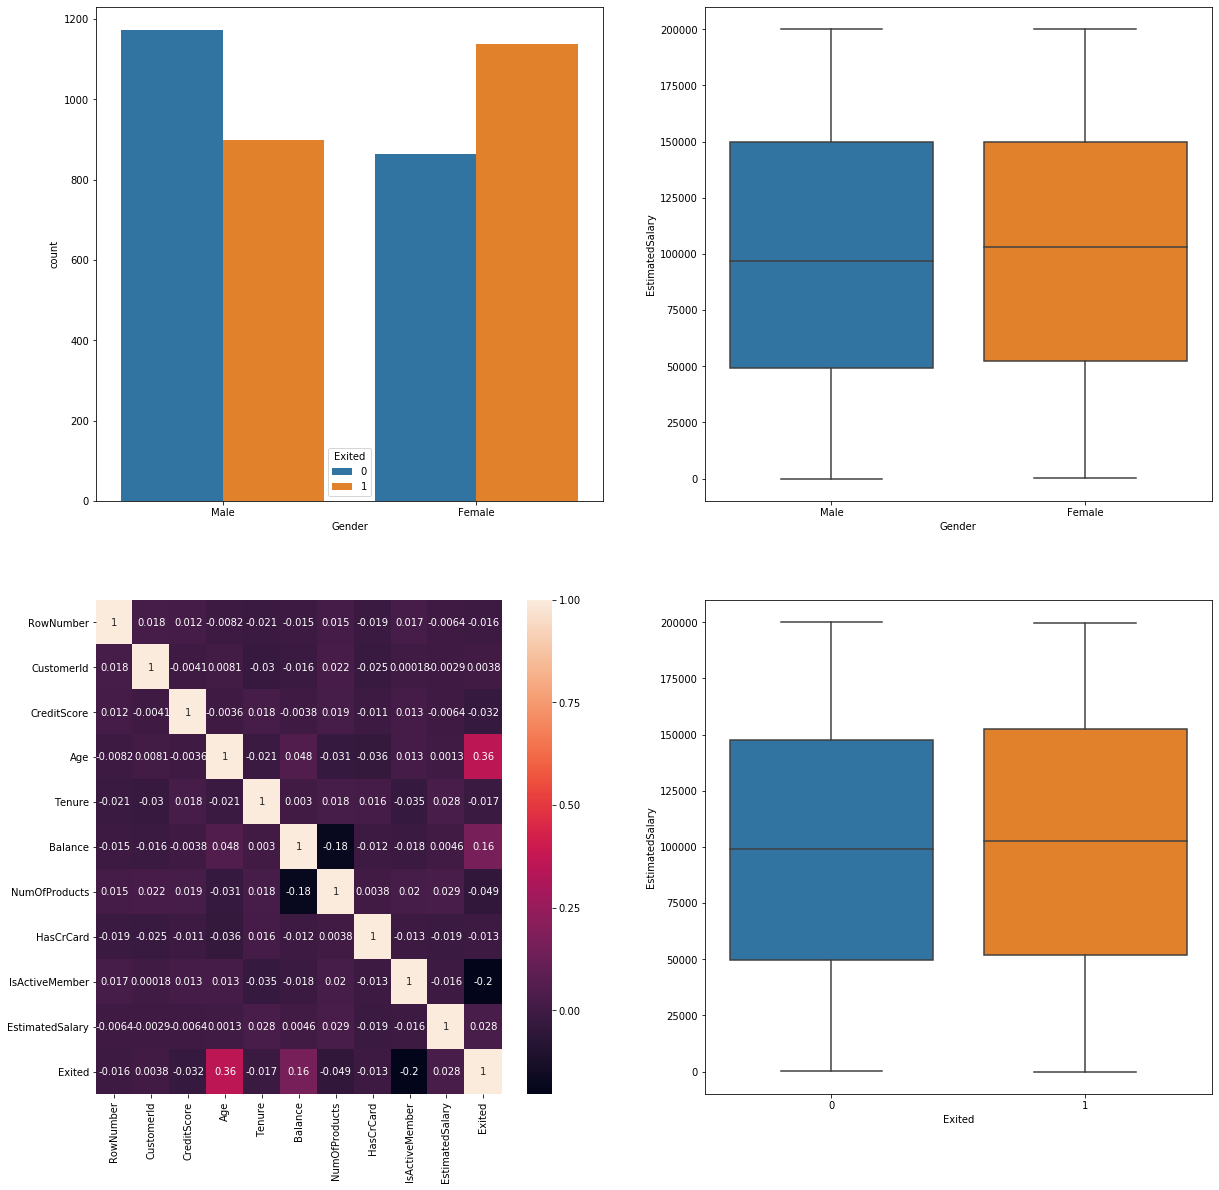

In [138]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(data = df, x ='Gender', hue ='Exited' )

plt.subplot(2,2,2)
sns.boxplot(data = df, x ='Gender', y = 'EstimatedSalary' )

plt.subplot(2,2,3)
sns.heatmap(df.corr(), annot=True)

plt.subplot(2,2,4)
sns.boxplot(data = df, x ='Exited', y = 'EstimatedSalary' )

In [140]:
cols = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

df = df[cols]
data = pd.get_dummies(df, drop_first=True)

In [141]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.56434072, 0.43565928])

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Activation, Flatten, Dropout

In [144]:
model = Sequential()

model.add(Dense(8, input_shape = X_train.shape[1:]))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(12))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
y_train = np.array(y_train)

In [107]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max', verbose= 1, patience=5)

In [145]:
model.fit(X_train, y_train, batch_size = 40, validation_split = 0.1, epochs = 45)

Train on 7200 samples, validate on 800 samples
Epoch 1/45
7200/7200 [==============================] - 2s 268us/sample - loss: 0.4858 - accuracy: 0.7947 - val_loss: 0.4499 - val_accuracy: 0.7950
Epoch 2/45
7200/7200 [==============================] - 1s 121us/sample - loss: 0.4533 - accuracy: 0.7961 - val_loss: 0.4364 - val_accuracy: 0.7950
Epoch 3/45
7200/7200 [==============================] - 1s 95us/sample - loss: 0.4404 - accuracy: 0.7961 - val_loss: 0.4247 - val_accuracy: 0.7950
Epoch 4/45
7200/7200 [==============================] - 1s 77us/sample - loss: 0.4308 - accuracy: 0.7968 - val_loss: 0.4155 - val_accuracy: 0.7937
Epoch 5/45
7200/7200 [==============================] - 1s 127us/sample - loss: 0.4241 - accuracy: 0.8043 - val_loss: 0.4088 - val_accuracy: 0.8012
Epoch 6/45
7200/7200 [==============================] - 1s 92us/sample - loss: 0.4181 - accuracy: 0.8122 - val_loss: 0.4037 - val_accuracy: 0.8075
Epoch 7/45
7200/7200 [==============================] - 1s 92us/samp

In [146]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

# Unbalanced Classes

In [147]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.485771,0.794722,0.449929,0.79500
1,0.453292,0.796111,0.436449,0.79500
2,0.440447,0.796111,0.424734,0.79500
3,0.430850,0.796806,0.415528,0.79375
4,0.424075,0.804306,0.408844,0.80125


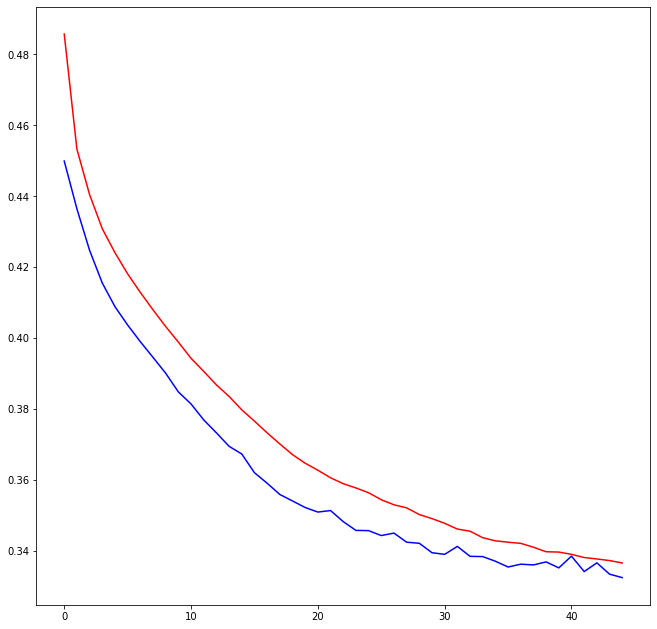

In [148]:
plt.figure(figsize=(11,11))
plt.plot(metrics['loss'], color='r')
plt.plot(metrics['val_loss'], color='b')

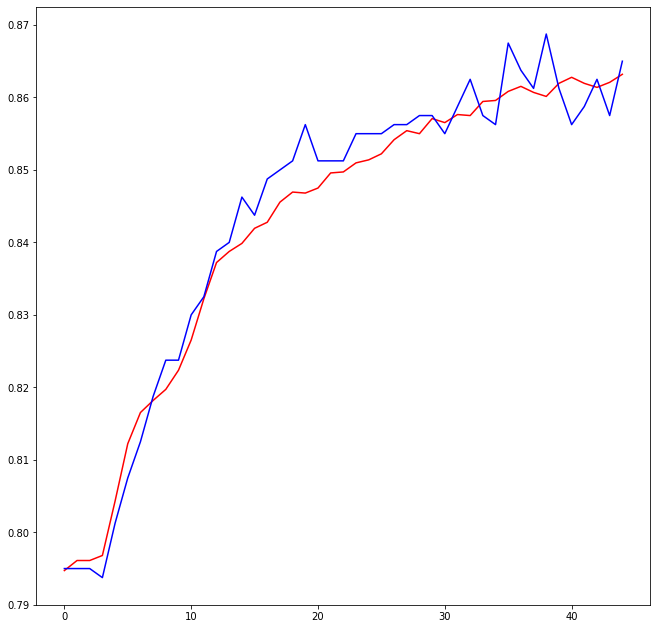

In [149]:
plt.figure(figsize=(11,11))
plt.plot(metrics['accuracy'], color='r')
plt.plot(metrics['val_accuracy'], color='b')

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, y_test)

0.8555

In [151]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.94      0.88      0.91      1702
        True       0.51      0.69      0.59       298

    accuracy                           0.86      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.88      0.86      0.86      2000



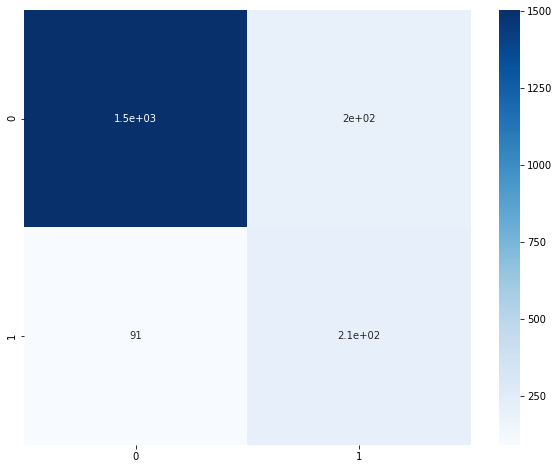

In [152]:
cm=confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues')

In [153]:
cm

array([[1504,  198],
       [  91,  207]], dtype=int64)

# Balanced Classes

In [110]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.701252,0.467099,0.689500,0.561350
1,0.683243,0.578929,0.670375,0.641104
2,0.665198,0.634504,0.647671,0.659509
3,0.641833,0.656325,0.618854,0.659509
4,0.615716,0.671667,0.591827,0.687117


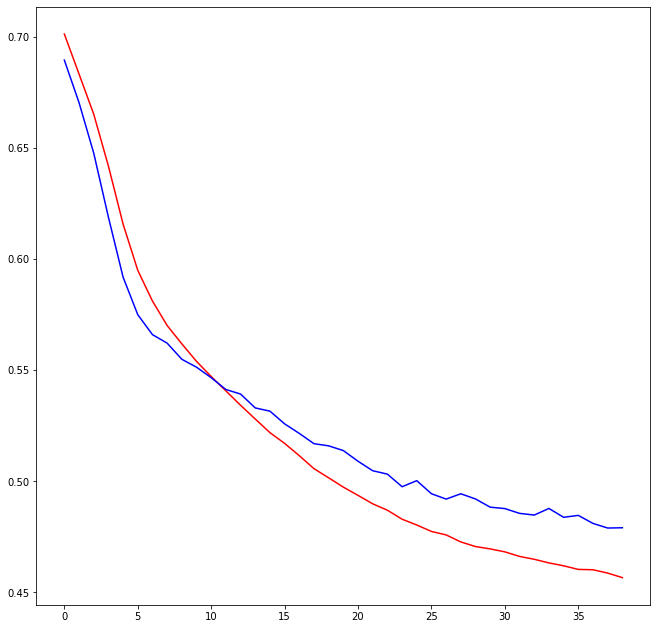

In [111]:
plt.figure(figsize=(11,11))
plt.plot(metrics['loss'], color='r')
plt.plot(metrics['val_loss'], color='b')

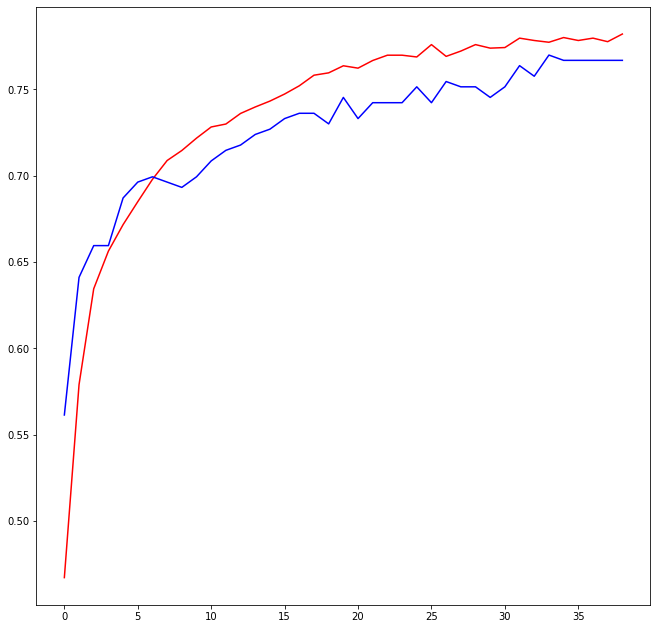

In [112]:
plt.figure(figsize=(11,11))
plt.plot(metrics['accuracy'], color='r')
plt.plot(metrics['val_accuracy'], color='b')

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, y_test)

0.7803680981595092

In [114]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.82      0.76      0.79       446
        True       0.74      0.80      0.77       369

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815



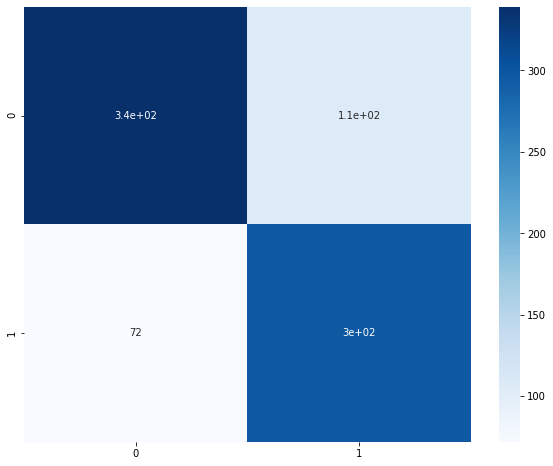

In [123]:
cm=confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues')

In [116]:
cm

array([[339, 107],
       [ 72, 297]], dtype=int64)